In [1]:
import pandas as pd #Gestiona bases de datos
import numpy as np #Arreglos
import matplotlib.pyplot as plt #Graficas


In [2]:
# Extraer las columnas de interés y manejar valores no numéricos
def extract_valid_column(df, column_index):
    column_data = pd.to_numeric(df.iloc[2:, column_index], errors='coerce')
    return column_data.values


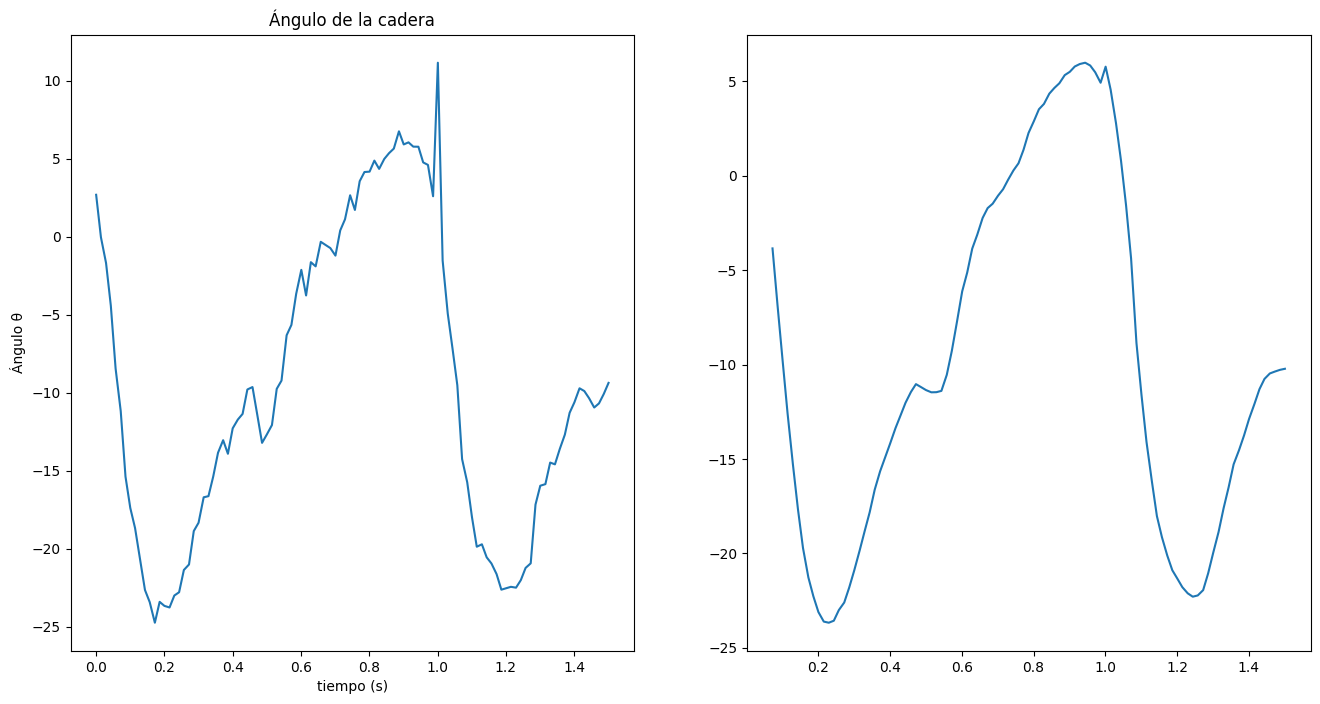

In [4]:
# Lectura de datos desde Excel
df = pd.read_excel('/content/gait (1).xls')
t = df.iloc[2:, 1]

#Obtener los datos del torso, la cadera y la rodilla
xb = extract_valid_column(df, 3) #base rib cage
yb = extract_valid_column(df, 4)
xh = extract_valid_column(df, 6) # hip
yh = extract_valid_column(df, 7)
xk = extract_valid_column(df, 9) # knee
yk = extract_valid_column(df, 10)

# ÁNGULO DE LA CADERA
hb = np.column_stack([xb - xh, yb - yh]) # vector 1 del torso a la cadera
kh = np.column_stack([xh - xk, yh - yk]) # vector 2 de la cadera a la rodilla

# Ángulos de los vectores
theta_hb = np.arctan2(hb[:, 1], hb[:, 0])
theta_kh = np.arctan2(kh[:, 1], kh[:, 0])

# Ángulo de la cadera
hip = theta_hb - theta_kh # angle of the hip
hip_deg = np.degrees(hip) # angle in degrees
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.plot(t, hip_deg)
plt.title('Ángulo de la cadera')
plt.xlabel('tiempo (s)')
plt.ylabel('Ángulo θ')


#filtrado de la señal
plt.subplot(122)
hip_deg_f=pd.Series(hip_deg).rolling(window=6).mean()
plt.plot(t,hip_deg_f)

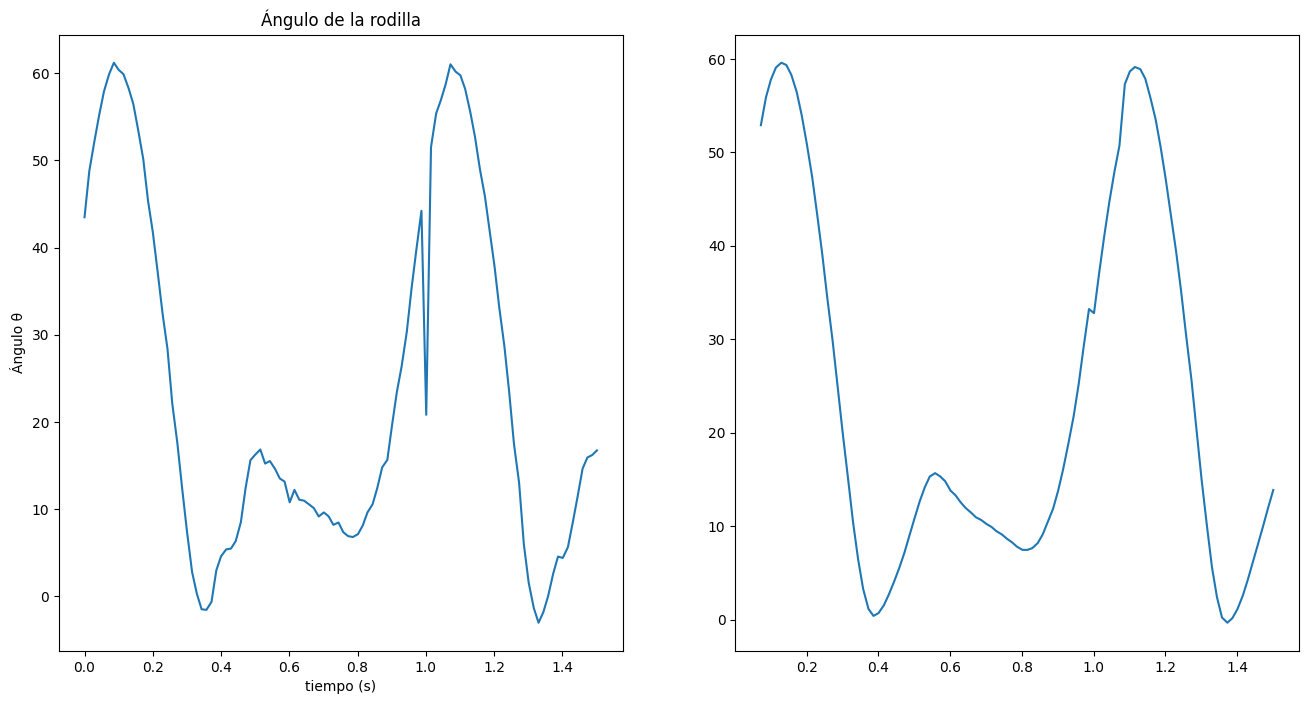

In [5]:
#Angulo de la rodilla
xb = extract_valid_column(df, 6) #base rib cage
yb = extract_valid_column(df, 7)
xh = extract_valid_column(df, 9) # Knee
yh = extract_valid_column(df, 10)
xn = extract_valid_column(df, 15) # anlke
yn = extract_valid_column(df, 16)

# ÁNGULO DE LA RODILLA
hb = np.column_stack([xb - xh, yb - yh]) # vector 1
kh = np.column_stack([xh - xn, yh - yn]) # vector 2


# Ángulos de los vectores de la rodilla
theta_hb = np.arctan2(hb[:, 1], hb[:, 0])
theta_kh = np.arctan2(kh[:, 1], kh[:, 0])

# Ángulo de la rodilla
hip = theta_hb - theta_kh # angle of the hip
hip_deg = np.degrees(hip) # angle in degrees
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.plot(t, hip_deg)
plt.title('Ángulo de la rodilla')
plt.xlabel('tiempo (s)')
plt.ylabel('Ángulo θ')


#filtrado de la señal
plt.subplot(122)
hip_deg_f=pd.Series(hip_deg).rolling(window=6).mean()
plt.plot(t,hip_deg_f)

Text(0.5, 0, 'Tiempo (s)')

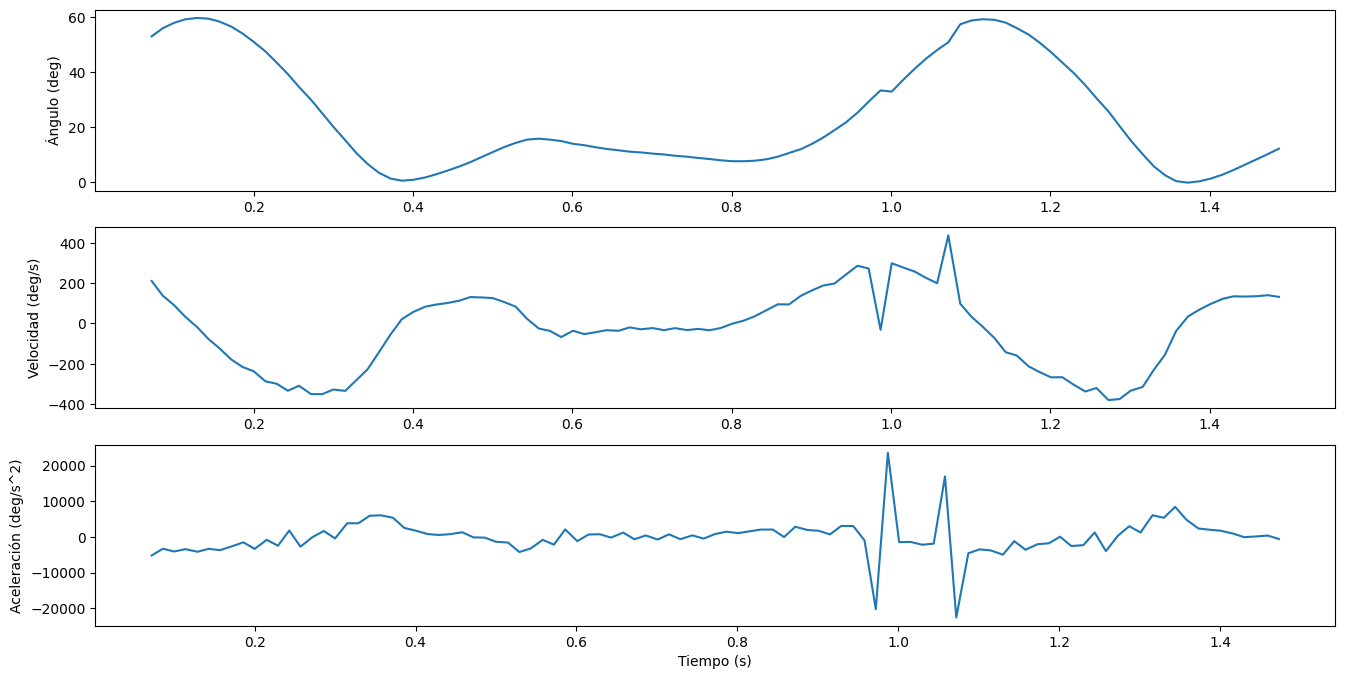

In [6]:
# Ángulo de la rodilla
knee = theta_hb - theta_kh
knee_deg = np.degrees(knee)

# Suavizar ángulo de la rodilla
knee_deg_f = pd.Series(knee_deg).rolling(window=6).mean()

# Velocidad angular de la rodilla
knee_vel = np.diff(knee_deg_f) / np.diff(t)

# Aceleración angular de la rodilla
knee_acc = np.diff(knee_vel) / np.diff(t[:-1])

plt.figure(figsize=[16,8])
plt.subplot(311)
plt.plot(t[:-1], knee_deg_f[:-1])
plt.ylabel('Ángulo (deg)')

plt.subplot(312)
plt.plot(t[:-1], knee_vel)
plt.ylabel('Velocidad (deg/s)')

plt.subplot(313)
plt.plot(t[:-2], knee_acc)
plt.ylabel('Aceleración (deg/s^2)')
plt.xlabel('Tiempo (s)')